In [39]:
import sklearn.ensemble
import sklearn.multiclass
import sklearn.model_selection
import sklearn.feature_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Read in preprocessed dataframes:
featuredf = pd.read_pickle('./processed.files/labelled/featureDfnew')
labelledDf = pd.read_pickle('./processed.files/labelled/labelledDfnew')

#Read in preprocessed numpy arrays:
preProcFeats = np.load('./processed.files/labelled/featuresnew.npy')
preProcLabels = np.load('./processed.files/labelled/labelsnew.npy')

In [20]:
MI = sklearn.feature_selection.mutual_info_classif(preProcFeats, preProcLabels, discrete_features = False)

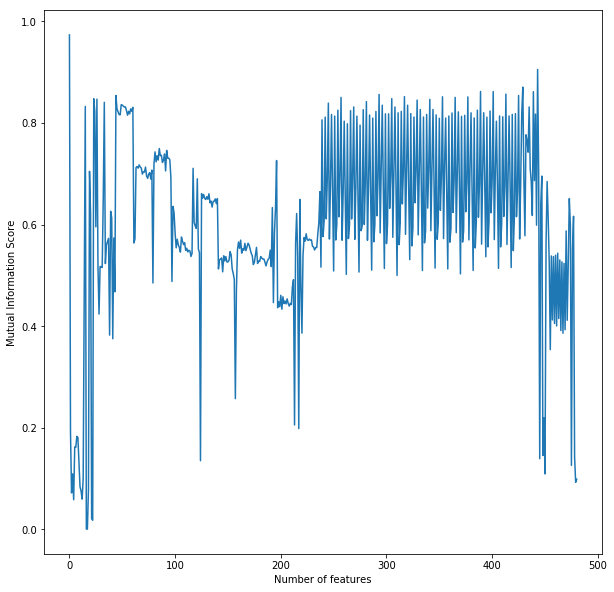

In [21]:
featidx = np.arange(preProcFeats.shape[1])

plt.figure()
plt.figure(figsize=(10, 10))
plt.xlabel('Number of features')
plt.ylabel('Mutual Information Score')
plt.plot(featidx, MI)
#plt.savefig('feature.importance.graphs/cv.png')
plt.show()

In [22]:
cols = featuredf.columns.values
print np.argwhere(cols=='pixelMax_0_0')
print np.argwhere(cols == 'pixelMean_15_3')

[[237]]
[[428]]


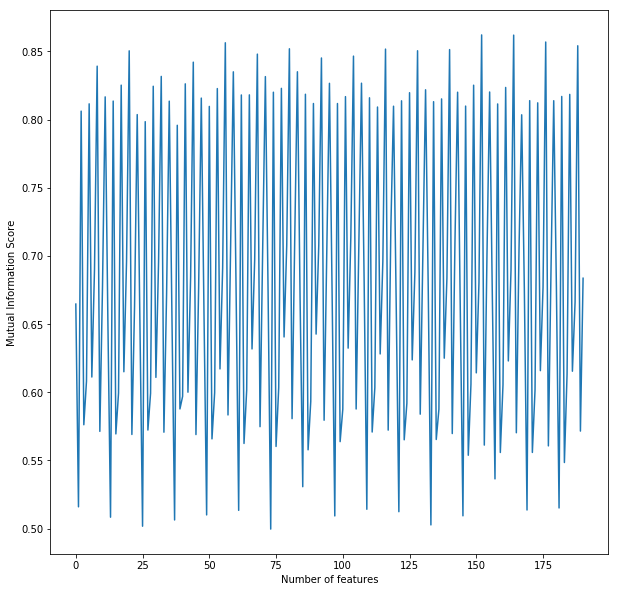

In [23]:
featidx = np.arange(preProcFeats.shape[1])
sliceMI = MI[237:428]

plt.figure()
plt.figure(figsize=(10, 10))
plt.xlabel('Number of features')
plt.ylabel('Mutual Information Score')
plt.plot(np.arange(sliceMI.size), sliceMI)
plt.savefig('feature.importance.graphs/pixelstatsMI.png')
plt.show()

In [24]:
highMI = np.argwhere(sliceMI > 0.7)
highMI = highMI + 237
#print highMI
print cols[highMI]

[['pixelMean_0_0']
 ['pixelMean_0_1']
 ['pixelMean_0_2']
 ['pixelMean_0_3']
 ['pixelMean_1_0']
 ['pixelMean_1_1']
 ['pixelMean_1_2']
 ['pixelMean_1_3']
 ['pixelMean_2_0']
 ['pixelMean_2_1']
 ['pixelMean_2_2']
 ['pixelMean_2_3']
 ['pixelMean_3_0']
 ['pixelMean_3_1']
 ['pixelMean_3_2']
 ['pixelMean_3_3']
 ['pixelMean_4_0']
 ['pixelMean_4_1']
 ['pixelMean_4_2']
 ['pixelMin_4_3']
 ['pixelMean_4_3']
 ['pixelMean_5_0']
 ['pixelMean_5_1']
 ['pixelMean_5_2']
 ['pixelMin_5_3']
 ['pixelMean_5_3']
 ['pixelMean_6_0']
 ['pixelMean_6_1']
 ['pixelMin_6_2']
 ['pixelMean_6_2']
 ['pixelMin_6_3']
 ['pixelMean_6_3']
 ['pixelMean_7_0']
 ['pixelMean_7_1']
 ['pixelMin_7_2']
 ['pixelMean_7_2']
 ['pixelMin_7_3']
 ['pixelMean_7_3']
 ['pixelMean_8_0']
 ['pixelMean_8_1']
 ['pixelMin_8_2']
 ['pixelMean_8_2']
 ['pixelMin_8_3']
 ['pixelMean_8_3']
 ['pixelMean_9_0']
 ['pixelMean_9_1']
 ['pixelMean_9_2']
 ['pixelMin_9_3']
 ['pixelMean_9_3']
 ['pixelMean_10_0']
 ['pixelMean_10_1']
 ['pixelMean_10_2']
 ['pixelMin_10_3']

In [25]:
cols = featuredf.columns.values
print np.argwhere(cols=='windTimeStatsstd0')
print np.argwhere(cols == 'windTimeStatsmean7')

[[45]]
[[132]]


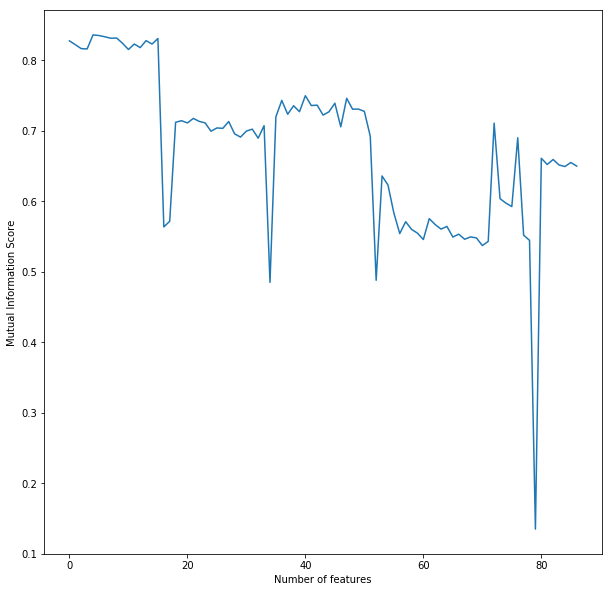

In [26]:
featidx = np.arange(preProcFeats.shape[1])
sliceMI = MI[45:132]

plt.figure()
plt.figure(figsize=(10, 10))
plt.xlabel('Number of features')
plt.ylabel('Mutual Information Score')
plt.plot(np.arange(sliceMI.size), sliceMI)
#plt.savefig('feature.importance.graphs/cv.png')
plt.show()

In [27]:
maxidx = np.array([])
for idx in featidx[237:428]:
    if (idx-237) % 3 == 0 :
        maxidx = np.append(maxidx, featidx[idx])

minidx = np.array([])
for idx in featidx[237:428]:
    if (idx-238) % 3 == 0 :
        minidx = np.append(minidx, featidx[idx])
   

meanidx = np.array([])
for idx in featidx[237:428]:
    if (idx-236) % 3 == 0 :
        meanidx = np.append(meanidx, featidx[idx])

print cols[237], cols[238], cols[239]

pixelMax_0_0 pixelMin_0_0 pixelMean_0_0


In [28]:
maxidx = maxidx.astype(int)
#print cols[maxidx]

minidx = minidx.astype(int)
#print cols[minidx]

meanidx = meanidx.astype(int)
#print cols[meanidx]

pixmax = preProcFeats[:, 237]
pixstatsmax = preProcFeats[:,maxidx]

pixmin = preProcFeats[:, 238]
pixstatsmin = preProcFeats[:,minidx]

pixmean = preProcFeats[:, 239]
pixstatsmean = preProcFeats[:, meanidx]

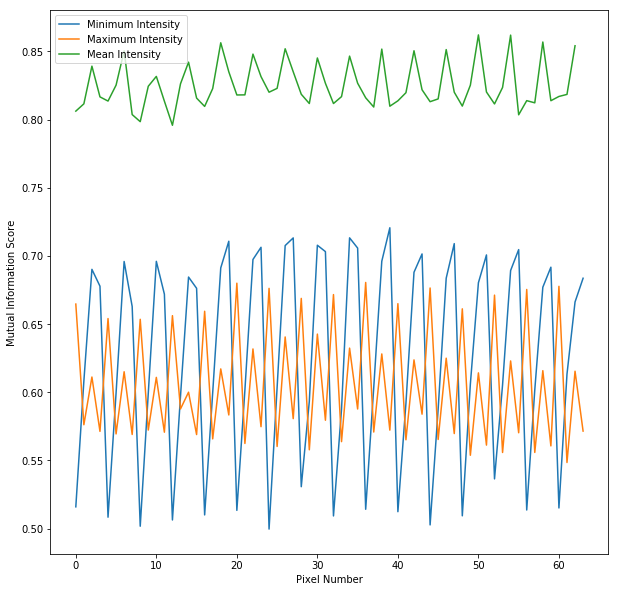

In [32]:
plt.figure()
plt.figure(figsize=(10, 10))
plt.xlabel('Pixel Number')
plt.ylabel('Mutual Information Score')
plt.plot(np.arange(minidx.size), MI[minidx], label = 'Minimum Intensity')
plt.plot(np.arange(maxidx.size), MI[maxidx], label = 'Maximum Intensity')
plt.plot(np.arange(meanidx.size), MI[meanidx], label = 'Mean Intensity')
#plt.ylim(1.1,4)
plt.legend()
plt.savefig('feature.importance.graphs/pixstatsMI.png')
plt.show()

In [13]:
MImin = sklearn.feature_selection.mutual_info_regression(pixstatsmin, pixmin, discrete_features = False)
MImax = sklearn.feature_selection.mutual_info_regression(pixstatsmax, pixmin, discrete_features = False)
MImean = sklearn.feature_selection.mutual_info_regression(pixstatsmean, pixmin, discrete_features = False)

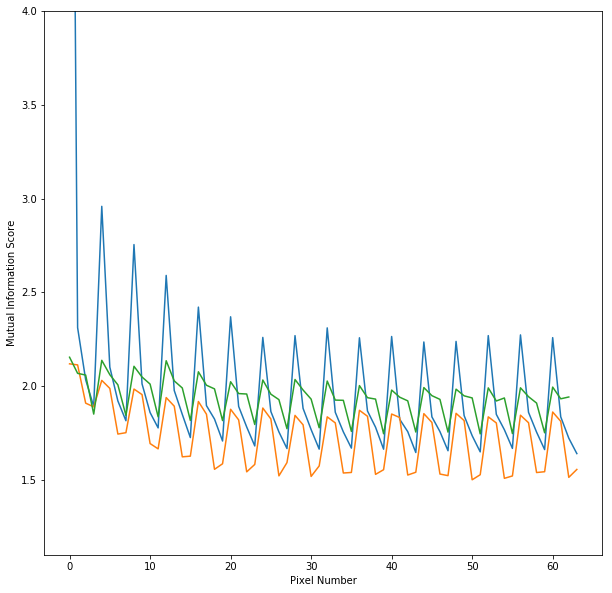

In [14]:
plt.figure()
plt.figure(figsize=(10, 10))
plt.xlabel('Pixel Number')
plt.ylabel('Mutual Information Score')
plt.plot(np.arange(pixstatsmin.shape[1]), MImin, label = 'Minimum Intensity')
plt.plot(np.arange(pixstatsmax.shape[1]), MImax, label = 'Maximum Intensity')
plt.plot(np.arange(pixstatsmean.shape[1]), MImean, label = 'Mean Intensity')
plt.ylim(1.1,4)
plt.savefig('feature.importance.graphs/pixstatsMI.png')
plt.show()

In [41]:
print pixmin.shape
pixminf = pixmin.reshape(-1,1)
MIself = sklearn.feature_selection.mutual_info_regression(pixminf, pixmin, discrete_features = False)
print MIself

(12398, 1)
[ 7.95331777]


In [40]:
preProcLabelsf = preProcLabels.reshape(-1,1)

MIself = sklearn.feature_selection.mutual_info_classif(preProcLabelsf, preProcLabels)

print MIself

[ 1.67063157]
